# 第6章 逻辑斯谛回归

逻辑斯谛回归(LR)是经典的分类方法

1．逻辑斯谛回归模型是由以下条件概率分布表示的分类模型。逻辑斯谛回归模型可以用于二类或多类分类。

$$P(Y=k | x)=\frac{\exp \left(w_{k} \cdot x\right)}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}, \quad k=1,2, \cdots, K-1$$

$$P(Y=K | x)=\frac{1}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}$$
这里，$x$为输入特征，$w$为特征的权值。

逻辑斯谛回归模型源自逻辑斯谛分布，其分布函数$F(x)$是$S$形函数。逻辑斯谛回归模型是由输入的线性函数表示的输出的对数几率模型。

2．最大熵模型是由以下条件概率分布表示的分类模型。最大熵模型也可以用于二类或多类分类。

$$P_{w}(y | x)=\frac{1}{Z_{w}(x)} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$
$$Z_{w}(x)=\sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$

其中，$Z_w(x)$是规范化因子，$f_i$为特征函数，$w_i$为特征的权值。

3．最大熵模型可以由最大熵原理推导得出。最大熵原理是概率模型学习或估计的一个准则。最大熵原理认为在所有可能的概率模型（分布）的集合中，熵最大的模型是最好的模型。

最大熵原理应用到分类模型的学习中，有以下约束最优化问题：

$$\min -H(P)=\sum_{x, y} \tilde{P}(x) P(y | x) \log P(y | x)$$

$$s.t.  \quad P\left(f_{i}\right)-\tilde{P}\left(f_{i}\right)=0, \quad i=1,2, \cdots, n$$
 
 $$\sum_{y} P(y | x)=1$$
 
求解此最优化问题的对偶问题得到最大熵模型。

4．逻辑斯谛回归模型与最大熵模型都属于对数线性模型。

5．逻辑斯谛回归模型及最大熵模型学习一般采用极大似然估计，或正则化的极大似然估计。逻辑斯谛回归模型及最大熵模型学习可以形式化为无约束最优化问题。求解该最优化问题的算法有改进的迭代尺度法、梯度下降法、拟牛顿法。



回归模型：$f(x) = \frac{1}{1+e^{-wx}}$

其中wx线性函数：$wx =w_0\cdot x_0 + w_1\cdot x_1 + w_2\cdot x_2 +...+w_n\cdot x_n,(x_0=1)$


In [ ]:
from math import exp # 引入指数函数
import numpy as np # 导包
import pandas as pd # 导包
import matplotlib.pyplot as plt # 导包
%matplotlib inline

from sklearn.datasets import load_iris # 导入数据集加载函数
from sklearn.model_selection import train_test_split # 导包

In [ ]:
# data
def create_data():
    iris = load_iris() # 加载数据集
    df = pd.DataFrame(iris.data, columns=iris.feature_names) # 创建数据表格
    df['label'] = iris.target # 增加一列label
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label'] # 列名
    data = np.array(df.iloc[:100, [0,1,-1]]) # 分割，取前100行，第1 2 和 最后一列
    # print(data)
    return data[:,:2], data[:,-1] # 分别返回前两列和最后一列

In [ ]:
X, y = create_data() # 特征和label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 分割出训练集和测试集

In [ ]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01): # 初始化函数
        self.max_iter = max_iter # 初始化最大迭代
        self.learning_rate = learning_rate # 初始化学习率

    def sigmoid(self, x): # 激活函数，logistic function
        return 1 / (1 + exp(-x)) # 返回计算结果，将输出控制在(0,1)

    def data_matrix(self, X):
        data_mat = [] # 初始化矩阵
        for d in X: # 遍历整个X
            data_mat.append([1.0, *d]) # 矩阵共70行（训练集），每一行是[1.0, X_i_1, X_i_2]  ？为啥要加一列？
        return data_mat # 返回

    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n 70*3
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32) # np.zeros((m, n), dtype=xxx) 得到一个元素类型为xxx的m*n的全为0的矩阵

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights)) # data_mat的每一行与weights做点积，然后再放入逻辑回归中，将结果赋值给result
                error = y[i] - result # 计算误差
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]]) # 权重累加，新权重=原+学习率*误差*data_mat一行的转置？为啥要这么算？
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter)) # 打印

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):
        right = 0 # 初始化正确分类的数量
        X_test = self.data_matrix(X_test) # X_test加一列
        for x, y in zip(X_test, y_test): # 遍历测试集
            result = np.dot(x, self.weights) # 点积
            if (result > 0 and y == 1) or (result < 0 and y == 0): # 判断是否分类正确
                right += 1 # 正确数量加一
        return right / len(X_test) # 返回正确率

In [ ]:
lr_clf = LogisticReressionClassifier() # 实例化分类器
lr_clf.fit(X_train, y_train) # 训练得到权重

In [ ]:
lr_clf.score(X_test, y_test) # 测试，计算得分

In [ ]:
x_ponits = np.arange(4, 8) # 从4到8生成步长为1的数组[4,5,6,7]
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2] # 跟感知机那一节同理
plt.plot(x_ponits, y_) # 作图

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0') # 散点图，取前50，label为0
plt.scatter(X[50:,0],X[50:,1], label='1') # 散点图，取后50，label为1
plt.legend() # 展示

### scikit-learn实例

#### sklearn.linear_model.LogisticRegression

solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
- a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
- b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

In [ ]:
from sklearn.linear_model import LogisticRegression # 导入sklearn中的逻辑斯谛回归分类器

In [ ]:
""" LogisticRegression
    parameters:
        penalty: 正则化（惩罚项）, 默认L2范数
        max_iter: 求解器收敛所需的最大迭代次数, 默认100
    attributes: 
        coef_: 表示向量w
        intercept_: 表示偏差b
    
    from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
"""
clf = LogisticRegression(max_iter=200) # 实例化，max_iter求解器收敛所需的最大迭代次数，迭代设为200

In [ ]:
clf.fit(X_train, y_train) # 训练

In [ ]:
clf.score(X_test, y_test) # 测试

In [ ]:
print(clf.coef_, clf.intercept_) # 打印向量w和偏差b

In [ ]:
x_ponits = np.arange(4, 8) # 4个点
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1] # 直线
plt.plot(x_ponits, y_) # 作图

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0') # 作图
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1') # 作图
plt.xlabel('sepal length') # 横坐标名字
plt.ylabel('sepal width') # 纵坐标名字
plt.legend() # 展示

## 最大熵模型

In [ ]:
import math
from copy import deepcopy

In [ ]:
class MaxEntropy:
    def __init__(self, EPS=0.005):
        self._samples = []
        self._Y = set()  # 标签集合，相当去去重后的y
        self._numXY = {}  # key为(x,y)，value为出现次数
        self._N = 0  # 样本数
        self._Ep_ = []  # 样本分布的特征期望值
        self._xyID = {}  # key记录(x,y),value记录id号
        self._n = 0  # 特征键值(x,y)的个数
        self._C = 0  # 最大特征数
        self._IDxy = {}  # key为(x,y)，value为对应的id号
        self._w = []
        self._EPS = EPS  # 收敛条件
        self._lastw = []  # 上一次w参数值

    def loadData(self, dataset):
        self._samples = deepcopy(dataset) # 深拷贝，创建一个新对象
        for items in self._samples: # 遍历数据集，计算出每一种联合(x ,y)的数量
            y = items[0] # 第一列作为label
            X = items[1:] # 后面作为特征
            self._Y.add(y)  # 集合中y若已存在则会自动忽略
            for x in X:
                if (x, y) in self._numXY:
                    self._numXY[(x, y)] += 1
                else:
                    self._numXY[(x, y)] = 1

        self._N = len(self._samples) # 记录样本数量
        self._n = len(self._numXY) # 记录特征键值的数量（联合的数量）
        self._C = max([len(sample) - 1 for sample in self._samples]) # 遍历数据集中每个样本的特征数量，取最大值
        self._w = [0] * self._n # 初始化参数w，此时为19个
        self._lastw = self._w[:] # 记录上次的参数

        self._Ep_ = [0] * self._n # 初始化期望
        for i, xy in enumerate(self._numXY):  # 计算特征函数fi关于经验分布的期望，？？？公式ΣP(x,y)f(x,y)，求和下标是x和y，P为(x ,y)的联合经验分布？？？这个是在求期望嘛？难道不是联合经验分布？
            self._Ep_[i] = self._numXY[xy] / self._N # 联合经验分布公式P(x,y)=num(xy)/N，num(xy)表示特征键值(X=x, Y=y)的数量，N表示训练样本容量
            self._xyID[xy] = i # 正着记
            self._IDxy[i] = xy # 反着记

    def _Zx(self, X):  # 计算每个Z(x)值，某个w_i对应的Z(x)值
        """ _Zx 称为规范化因子 $Zx = Σexp(Σw_i*f_i(x,y))$ 第一个Σ下标为y 第二个下标为i(i=1,2,...,n 特征个数)
            args:
                X是某个参数w_i对应的特征向量
        """
        zx = 0 # 初始化Z(x)值
        for y in self._Y: # 由于第一个Σ下标为y，故只需遍历所有的y几个，在此是2个（yes和no）
            ss = 0 # 初始化内层求和
            for x in X: # 遍历特征向量的每个特征
                if (x, y) in self._numXY: # 由于第二个Σ的下标是i，从1到特征个数n，而且根据特征函数的定义（x与y满足某一事实为1，否则为0），所以只累加特征特征为1的。
                    ss += self._w[self._xyID[(x, y)]]*1 # 根据(x,y)取出id，再取出对应id的参数w，累加到ss上（？？？为什么不是累加w_i*f_i。因为特征函数非0即1，1省略）
            zx += math.exp(ss) # 累加
        return zx # 返回结果

    def _model_pyx(self, y, X):  # 计算每个P(y|x) 公式P(y|x)=exp(Σw_i*f_i)/z(x)，Σ从1到n，这里计算某个参数w_i的P(y|x)
        zx = self._Zx(X) # 计算某个w_i对应的X,y的Zx值
        ss = 0 # 初始化求和
        for x in X: # 遍历该特征向量的每个特征
            if (x, y) in self._numXY: # 同理，只累加特征函数为1的
                ss += self._w[self._xyID[(x, y)]]*1 # 同理，特征函数值为1
        pyx = math.exp(ss) / zx # 套公式
        return pyx # 返回

    def _model_ep(self, index):  # 计算特征函数fi关于模型的期望，模型的期望？？？
        x, y = self._IDxy[index] # 根据id找(x,y)
        ep = 0 # 期望
        for sample in self._samples: # 遍历训练集
            if x not in sample: # 只求当前特征函数f_i(x, y)的期望
                continue
            pyx = self._model_pyx(y, sample) # 求其中一个参数w_i的P(y|x)
            ep += pyx / self._N # ？？？怎么跟公式不一样呢？？
        return ep

    def _convergence(self):  # 判断是否全部收敛
        for last, now in zip(self._lastw, self._w): # 遍历全部旧参数和新参数
            if abs(last - now) >= self._EPS: # 计算差的绝对值，判断是否大于收敛条件
                return False # 否
        return True # 全部收敛

    def predict(self, X):  # 计算预测概率
        Z = self._Zx(X) # 计算规范化因子
        result = {} # 初始化
        for y in self._Y:
            ss = 0
            for x in X:
                if (x, y) in self._numXY: # x,y符合条件的
                    ss += self._w[self._xyID[(x, y)]] # 利用训练得到的参数w累加求和
            pyx = math.exp(ss) / Z # 计算在X的条件下，y的概率
            result[y] = pyx # 将y_i的预测结果放入结果集
        return result # 返回

    def train(self, maxiter=1000):  # 训练数据
        for loop in range(maxiter):  # 最大训练次数
            print("iter:%d" % loop) # 打印第几轮训练
            self._lastw = self._w[:] # 记录一下上一次的参数w
            for i in range(self._n): # 遍历每个特征函数
                ep = self._model_ep(i)  # 计算第i个特征的模型期望
                self._w[i] += math.log(self._Ep_[i] / ep) / self._C  # 更新参数
            print("w:", self._w) # 打印参数
            if self._convergence():  # 判断是否收敛
                break # 停止训练

In [ ]:
dataset = [['no', 'sunny', 'hot', 'high', 'FALSE'],
           ['no', 'sunny', 'hot', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'high', 'FALSE'],
           ['yes', 'rainy', 'mild', 'high', 'FALSE'],
           ['yes', 'rainy', 'cool', 'normal', 'FALSE'],
           ['no', 'rainy', 'cool', 'normal', 'TRUE'],
           ['yes', 'overcast', 'cool', 'normal', 'TRUE'],
           ['no', 'sunny', 'mild', 'high', 'FALSE'],
           ['yes', 'sunny', 'cool', 'normal', 'FALSE'],
           ['yes', 'rainy', 'mild', 'normal', 'FALSE'],
           ['yes', 'sunny', 'mild', 'normal', 'TRUE'],
           ['yes', 'overcast', 'mild', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'normal', 'FALSE'],
           ['no', 'rainy', 'mild', 'high', 'TRUE']] # 定义数据集

In [ ]:
maxent = MaxEntropy() # 实例化模型
x = ['overcast', 'mild', 'high', 'FALSE'] # 测试特征向量

In [ ]:
maxent.loadData(dataset) # 加载数据集
maxent.train() # 训练

In [ ]:
print('predict:', maxent.predict(x)) # 预测一下

## 第6章Logistic回归与最大熵模型-习题

### 习题6.1
&emsp;&emsp;确认Logistic分布属于指数分布族。

**解答：**  
**第1步：**  
首先给出指数分布族的定义：  
对于随机变量$x$，在给定参数$\eta$下，其概率分别满足如下形式：$$p(x|\eta)=h(x)g(\eta)\exp(\eta^Tu(x))$$我们称之为**指数分布族**。  
其中：  
$x$：可以是标量或者向量，可以是离散值也可以是连续值  
$\eta$：自然参数  
$g(\eta)$：归一化系数  
$h(x),u(x)$：$x$的某个函数  

----

**第2步：**证明伯努利分布属于指数分布族  
伯努利分布：$\varphi$是$y=1$的概率，即$P(Y=1)=\varphi$  
$\begin{aligned}
P(y|\varphi) 
&= \varphi^y (1-\varphi)^{(1-y)} \\
&= (1-\varphi) \varphi^y (1-\varphi)^{(-y)} \\
&= (1-\varphi) (\frac{\varphi}{1-\varphi})^y \\
&= (1-\varphi) \exp\left(y \ln \frac{\varphi}{1-\varphi} \right) \\
&= \frac{1}{1+e^\eta} \exp (\eta y)
\end{aligned}$  
其中，$\displaystyle \eta=\ln \frac{\varphi}{1-\varphi} \Leftrightarrow \varphi = \frac{1}{1+e^{-\eta}}$  
将$y$替换成$x$，可得$\displaystyle P(x|\eta) = \frac{1}{1+e^\eta} \exp (\eta x)$
对比可知，伯努利分布属于指数分布族，其中$\displaystyle h(x) = 1, g(\eta)= \frac{1}{1+e^\eta}, u(x)=x$  

----

**第3步：**  
广义线性模型（GLM）必须满足三个假设：
1. $y | x;\theta \sim ExponentialFamily(\eta)$，即假设预测变量$y$在给定$x$，以$\theta$为参数的条件概率下，属于以$\eta$作为自然参数的指数分布族；  
2. 给定$x$，求解出以$x$为条件的$T(y)$的期望$E[T(y)|x]$，即算法输出为$h(x)=E[T(y)|x]$  
3. 满足$\eta=\theta^T x$，即自然参数和输入特征向量$x$之间线性相关，关系由$\theta$决定，仅当$\eta$是实数时才有意义，若$\eta$是一个向量，则$\eta_i=\theta_i^T x$

----

**第4步：**推导伯努利分布的GLM  
已知伯努利分布属于指数分布族，对给定的$x,\eta$，求解期望：$$\begin{aligned}
h_{\theta}(x) 
&= E[y|x;\theta] \\
&= 1 \cdot p(y=1)+ 0 \cdot p(y=0) \\
&= \varphi \\
&= \frac{1}{1+e^{-\eta}} \\
&= \frac{1}{1+e^{-\theta^T x}}
\end{aligned}$$可得到Logistic回归算法，故Logistic分布属于指数分布族，得证。

### 习题6.2
&emsp;&emsp;写出Logistic回归模型学习的梯度下降算法。

**解答：**  
对于Logistic模型：$$P(Y=1 | x)=\frac{\exp (w \cdot x+b)}{1+\exp (w \cdot x+b)} \\ P(Y=0 | x)=\frac{1}{1+\exp (w \cdot x+b)}$$对数似然函数为：$\displaystyle L(w)=\sum_{i=1}^N \left[y_i (w \cdot x_i)-\log \left(1+\exp (w \cdot x_i)\right)\right]$  
似然函数求偏导，可得$\displaystyle \frac{\partial L(w)}{\partial w^{(j)}}=\sum_{i=1}^N\left[x_i^{(j)} \cdot y_i-\frac{\exp (w \cdot x_i) \cdot x_i^{(j)}}{1+\exp (w \cdot x_i)}\right]$  
梯度函数为：$\displaystyle \nabla L(w)=\left[\frac{\partial L(w)}{\partial w^{(0)}}, \cdots, \frac{\partial L(w)}{\partial w^{(m)}}\right]$  
Logistic回归模型学习的梯度下降算法：  
(1) 取初始值$x^{(0)} \in R$，置$k=0$  
(2) 计算$f(x^{(k)})$  
(3) 计算梯度$g_k=g(x^{(k)})$，当$\|g_k\| < \varepsilon$时，停止迭代，令$x^* = x^{(k)}$；否则，求$\lambda_k$，使得$\displaystyle f(x^{(k)}+\lambda_k g_k) = \max_{\lambda \geqslant 0}f(x^{(k)}+\lambda g_k)$  
(4) 置$x^{(k+1)}=x^{(k)}+\lambda_k g_k$，计算$f(x^{(k+1)})$，当$\|f(x^{(k+1)}) - f(x^{(k)})\| < \varepsilon$或 $\|x^{(k+1)} - x^{(k)}\| < \varepsilon$时，停止迭代，令$x^* = x^{(k+1)}$  
(5) 否则，置$k=k+1$，转(3)

In [61]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import mpl

# 图像显示中文
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']


class LogisticRegression:
    def __init__(self, learn_rate=0.1, max_iter=10000, tol=1e-2):
        self.learn_rate = learn_rate  # 学习率
        self.max_iter = max_iter  # 迭代次数
        self.tol = tol  # 迭代停止阈值
        self.w = None  # 权重

    def preprocessing(self, X):
        """将原始X末尾加上一列，该列数值全部为1"""
        row = X.shape[0]
        y = np.ones(row).reshape(row, 1) # 6*1二维数组
        X_prepro = np.hstack((X, y)) # X合并y，成为6*4
        return X_prepro

    def sigmod(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X_train, y_train):
        X = self.preprocessing(X_train) # 处理特征
        y = y_train.T # 转置
        # 初始化权重w
        self.w = np.array([[0] * X.shape[1]], dtype=np.float64) # np.float改为np.float64
        k = 0
        for loop in range(self.max_iter): # 最大迭代次数max_iter
            # 计算梯度
            z = np.dot(X, self.w.T) # 点积
            grad = X * (y - self.sigmod(z))
            grad = grad.sum(axis=0)
            # 利用梯度的绝对值作为迭代中止的条件
            if (np.abs(grad) <= self.tol).all():
                break
            else:
                # 更新权重w 梯度上升——求极大值
                self.w += self.learn_rate * grad
                k += 1
        print("迭代次数：{}次".format(k))
        print("最终梯度：{}".format(grad))
        print("最终权重：{}".format(self.w[0]))

    def predict(self, x):
        p = self.sigmod(np.dot(self.preprocessing(x), self.w.T))
        print("Y=1的概率被估计为：{:.2%}".format(p[0][0]))  # 调用score时，注释掉
        p[np.where(p > 0.5)] = 1
        p[np.where(p < 0.5)] = 0
        return p

    def score(self, X, y):
        y_c = self.predict(X)
        error_rate = np.sum(np.abs(y_c - y.T)) / y_c.shape[0]
        return 1 - error_rate

    def draw(self, X, y):
        # 分离正负实例点
        y = y[0]
        X_po = X[np.where(y == 1)]
        X_ne = X[np.where(y == 0)]
        # 绘制数据集散点图
        ax = plt.axes(projection='3d')
        x_1 = X_po[0, :]
        y_1 = X_po[1, :]
        z_1 = X_po[2, :]
        x_2 = X_ne[0, :]
        y_2 = X_ne[1, :]
        z_2 = X_ne[2, :]
        ax.scatter(x_1, y_1, z_1, c="r", label="正实例")
        ax.scatter(x_2, y_2, z_2, c="b", label="负实例")
        ax.legend(loc='best')
        # 绘制p=0.5的区分平面
        x = np.linspace(-3, 3, 3)
        y = np.linspace(-3, 3, 3)
        x_3, y_3 = np.meshgrid(x, y)
        a, b, c, d = self.w[0]
        z_3 = -(a * x_3 + b * y_3 + d) / c
        ax.plot_surface(x_3, y_3, z_3, alpha=0.5)  # 调节透明度
        plt.show()

迭代次数：3232次
最终梯度：[ 0.00144779  0.00046133  0.00490279 -0.00999848]
最终权重：[  2.96908597   1.60115396   5.04477438 -13.43744079]


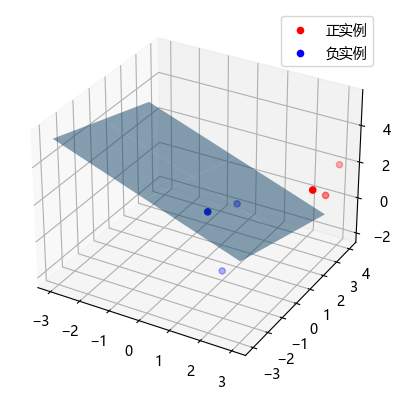

In [62]:
# 训练数据集
X_train = np.array([[3, 3, 3], [4, 3, 2], [2, 1, 2], [1, 1, 1], [-1, 0, 1],
                    [2, -2, 1]])
y_train = np.array([[1, 1, 1, 0, 0, 0]])
# 构建实例，进行训练
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.draw(X_train, y_train)

### 习题6.3
&emsp;&emsp;写出最大熵模型学习的DFP算法。（关于一般的DFP算法参见附录B）

**解答：**  
**第1步：**  
最大熵模型为：$$
\begin{array}{cl}
{\max } & {H(p)=-\sum_{x, y} P(x) P(y | x) \log P(y | x)} \\ 
{\text {st.}} &
{E_p(f_i)-E_{\hat{p}}(f_i)=0, \quad i=1,2, \cdots,n} \\ 
& {\sum_y P(y | x)=1}
\end{array}$$引入拉格朗日乘子，定义拉格朗日函数：$$
L(P, w)=\sum_{xy} P(x) P(y | x) \log P(y | x)+w_0 \left(1-\sum_y P(y | x)\right) \\
+\sum_{i=1} w_i\left(\sum_{xy} P(x, y) f_i(x, y)-\sum_{xy} P(x, y) P(y | x) f_i(x, y)\right)$$
最优化原始问题为：$$\min_{P \in C} \max_{w} L(P,w)$$对偶问题为：$$\max_{w} \min_{P \in C} L(P,w)$$令$$\Psi(w) = \min_{P \in C} L(P,w) = L(P_w, w)$$$\Psi(w)$称为对偶函数，同时，其解记作$$P_w = \mathop{\arg \min}_{P \in C} L(P,w) = P_w(y|x)$$求$L(P,w)$对$P(y|x)$的偏导数，并令偏导数等于0，解得：$$P_w(y | x)=\frac{1}{Z_w(x)} \exp \left(\sum_{i=1}^n w_i f_i (x, y)\right)$$其中：$$Z_w(x)=\sum_y \exp \left(\sum_{i=1}^n w_i f_i(x, y)\right)$$则最大熵模型目标函数表示为$$\varphi(w)=\min_{w \in R_n} \Psi(w) = \sum_{x} P(x) \log \sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)-\sum_{x, y} P(x, y) \sum_{i=1}^{n} w_{i} f_{i}(x, y)$$  

**第2步：**  
DFP的$G_{k+1}$的迭代公式为：$$G_{k+1}=G_k+\frac{\delta_k \delta_k^T}{\delta_k^T y_k}-\frac{G_k y_k y_k^T G_k}{y_k^T G_k y_k}$$  
**最大熵模型的DFP算法：**   
输入：目标函数$\varphi(w)$，梯度$g(w) = \nabla g(w)$，精度要求$\varepsilon$；  
输出：$\varphi(w)$的极小值点$w^*$  
(1)选定初始点$w^{(0)}$，取$G_0$为正定对称矩阵，置$k=0$  
(2)计算$g_k=g(w^{(k)})$，若$\|g_k\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k)}$，否则转(3)  
(3)置$p_k=-G_kg_k$  
(4)一维搜索：求$\lambda_k$使得$$\varphi\left(w^{(k)}+\lambda_k P_k\right)=\min _{\lambda \geqslant 0} \varphi\left(w^{(k)}+\lambda P_{k}\right)$$(5)置$w^{(k+1)}=w^{(k)}+\lambda_k p_k$  
(6)计算$g_{k+1}=g(w^{(k+1)})$，若$\|g_{k+1}\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k+1)}$；否则，按照迭代式算出$G_{k+1}$  
(7)置$k=k+1$，转(3)  

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)